In [1]:
# -*- coding:utf-8 -*-
from scipy import stats

[k for k, v in stats.__dict__.items() if isinstance(v, stats.rv_continuous)]

['genhalflogistic',
 'triang',
 'kappa3',
 'rayleigh',
 'betaprime',
 'foldnorm',
 'genlogistic',
 'gilbrat',
 'genpareto',
 'lognorm',
 'anglit',
 'truncnorm',
 'expon',
 'norm',
 'nakagami',
 'weibull_min',
 'invgauss',
 'logistic',
 'ncx2',
 'halfnorm',
 'fisk',
 'halfgennorm',
 'tukeylambda',
 'frechet_l',
 'dgamma',
 'pareto',
 'halflogistic',
 'semicircular',
 'invweibull',
 'ksone',
 'mielke',
 't',
 'gengamma',
 'johnsonsu',
 'powernorm',
 'powerlaw',
 'burr',
 'johnsonsb',
 'wrapcauchy',
 'argus',
 'genextreme',
 'gamma',
 'wald',
 'ncf',
 'arcsine',
 'maxwell',
 'gausshyper',
 'rice',
 'alpha',
 'vonmises_line',
 'loglaplace',
 'exponweib',
 'pearson3',
 'chi',
 'burr12',
 'cosine',
 'kstwobign',
 'recipinvgauss',
 'levy_stable',
 'beta',
 'foldcauchy',
 'truncexpon',
 'genexpon',
 'erlang',
 'reciprocal',
 'f',
 'lomax',
 'loggamma',
 'invgamma',
 'laplace',
 'powerlognorm',
 'vonmises',
 'exponnorm',
 'frechet_r',
 'rdist',
 'dweibull',
 'gumbel_r',
 'gompertz',
 'halfcauch

In [2]:
stats.norm.stats()

(array(0.0), array(1.0))

In [3]:
X = stats.norm(loc=1.0, scale=2.0)
X.stats()

(array(1.0), array(4.0))

In [4]:
import numpy as np
x = X.rvs(size=10000)
np.mean(x), np.var(x)

(1.0296270422719747, 3.9739292131906332)

In [5]:
print np.max(x), np.min(x)
print stats.norm.fit(x)

8.65685368613 -7.36082727505
(1.0296270422719747, 1.9934716484541819)


In [6]:
pdf, t = np.histogram(x, bins=100, normed=True)
# print t
t = (t[:-1] + t[1:]) * 0.5 # （从0到最后 + 从1到最后）/ 2 求每个区间的中点位置
# print t
cdf = np.cumsum(pdf) * (t[1] - t[0])
p_error = pdf - X.pdf(t)
c_error = cdf - X.cdf(t)
print "max pdf error: {}, max cdf error: {}".format(np.abs(p_error).max(), np.abs(c_error).max())

max pdf error: 0.0207834829789, max cdf error: 0.0148355255896


In [7]:
x = range(1, 7)
p = (0.4, 0.2, 0.1, 0.1, 0.1, 0.1)

dice = stats.rv_discrete(values=(x, p))
dice.rvs(size=20)

array([1, 1, 2, 5, 1, 1, 1, 5, 1, 2, 1, 2, 1, 1, 1, 4, 1, 1, 2, 1])

In [8]:
np.random.seed(42)
samples = dice.rvs(size=(20000, 50))
samples_mean = np.mean(samples, axis=1)
print samples_mean
print dice.stats()
print stats.norm.fit(samples_mean) # 期望为μ，方差为σ/n

[ 2.32  2.64  2.56 ...,  2.46  2.96  2.68]
(array(2.6), array(3.04))
(2.6013379999999997, 0.248077185077548)


/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


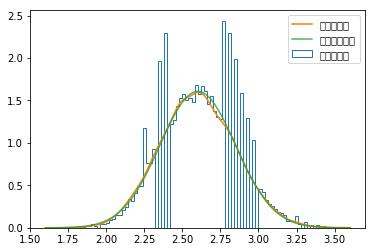

In [9]:
#coding:utf-8
import matplotlib.pyplot as pl

pl.rcParams['font.sans-serif']=['SimHei']
pl.rcParams['axes.unicode_minus']=False

_, bins, step = pl.hist(samples_mean, bins=100, normed=True, histtype="step", label=u"直方图统计")
kde = stats.kde.gaussian_kde(samples_mean)
x = np.linspace(bins[0], bins[-1], 100)
pl.plot(x, kde(x), label=u"核密度估计")
mean, std = stats.norm.fit(samples_mean)
pl.plot(x, stats.norm(mean, std).pdf(x), alpha=0.8, label=u"正态分布拟合")
pl.legend()
pl.show()

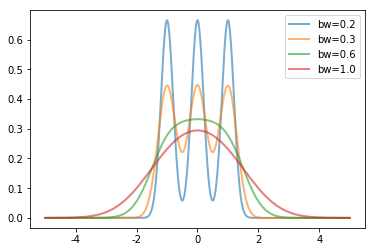

In [11]:
for bw in [0.2, 0.3, 0.6, 1.0]:
    kde = stats.gaussian_kde([-1, 0, 1], bw_method=bw)
    x = np.linspace(-5, 5, 1000)
    y = kde(x)
    pl.plot(x, y, lw=2, label="bw={}".format(bw), alpha=0.6)
pl.legend(loc="best")
pl.show()

In [13]:
np.random.seed(42)

def sim_poisson(lambda_, time):
    t = np.random.uniform(0, time, size=lambda_ * time)
    count, time_edges = np.histogram(t, bins=time, range=(0, time))
    dist, count_edges = np.histogram(count, bins=20, range=(0, 20), density=True)
    x = count_edges[:-1]
    poisson = stats.poisson.pmf(x, lambda_)
    return x, poisson, dist

lambda_ = 10
times = 1000, 50000
x1, poisson1, dist1 = sim_poisson(lambda_, times[0])
x2, poisson2, dist2 = sim_poisson(lambda_, times[1])
max_error1 = np.max(np.abs(dist1 - poisson1))
max_error2 = np.max(np.abs(dist2 - poisson2))
print "time={}, max_error={}".format(times[0], max_error1)
print "time={}, max_error={}".format(times[1], max_error2)

time=1000, max_error=0.019642302016
time=50000, max_error=0.00179801289496


In [21]:
T = 100000 # 模拟的总时间
A_count = T / 5  # T时间内公交车A到达站点S的次数
B_count = T / 10 # T时间内公交车B到达站点S的次数

# 使用均匀分布模拟公交车到达S站点的时刻
A_time = np.random.uniform(0, T, A_count) 
B_time = np.random.uniform(0, T, B_count)

# 合并A、B公交车到达S的时刻并排序
bus_time = np.concatenate((A_time, B_time))
bus_time.sort()

N = 200000 # 到达S站点乘客的数量
# 使用均匀分布模拟在第一辆和最后一辆公交车到达S的两个时刻之间N个乘客到达S时的时刻
passenger_time = np.random.uniform(bus_time[0], bus_time[-1], N)

# np.searchsorted(a, v, side='left', sorter=None)
# Find the indices into a sorted array a such that,
# if the corresponding elements in v were inserted 
# before the indices, the order of a would be preserved.
# 返回passenger_time数组中的每个元素应该插入在bus_time数组中那个元素的左边，返回bus_time
# 数组中对应元素的索引坐标数组，该数组大小与passsenger_time数组大小相同。
idx = np.searchsorted(bus_time, passenger_time)
np.mean(bus_time[idx] - passenger_time) * 60

198.26648349890149

In [22]:
from scipy import integrate

t = 10.0 / 3
bus_interval = stats.gamma(1, scale=t)
n, _ = integrate.quad(lambda x: 0.5 * x * x * bus_interval.pdf(x), 0, 1000)
d, _ = integrate.quad(lambda x: x * bus_interval.pdf(x), 0, 1000)
n / d * 60

200.0